<a href="https://colab.research.google.com/github/MrCherveN/DataAnalist-7-0_HomeTasks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [1]:
!pip install mysql-connector-python

In [2]:
import datetime
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
from mysql.connector.connection import MySQLConnection

In [3]:
!pip install mysql-connector-python

In [4]:
import json

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
with open('/content/drive/MyDrive/Python/Аналітик 7-0/Лекции/Модуль 5/hometasks/db_creds.json') as f:
    creds = json.load(f)

In [7]:
creds.keys()

dict_keys(['host_name', 'user_name', 'password', 'port', 'database'])

In [8]:
con = mysql.connector.connect(user=creds['user_name'], password=creds['password'],
                              host=creds['host_name'], port=creds['port'],
                              database=creds['database'])

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [9]:
import warnings

warnings.filterwarnings('ignore')

In [10]:
# переглянемо таблиці БД
pd.read_sql(f'show tables', con)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,salaries
7,titles


In [11]:
# переглянемо структуру таблиці employees
pd.read_sql(f'show columns from employees', con)

,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,birth_date,date,NO,,None,
2,first_name,varchar(14),NO,,None,
3,last_name,varchar(16),NO,,None,
4,gender,"enum('M','F')",NO,,None,
5,hire_date,date,NO,,None,


In [12]:
df = pd.read_sql('select year(hire_date) as hire_year, count(*) as emp_num from employees group by 1', con)
df

,hire_year,emp_num
0,1986,36150
1,1985,35316
2,1989,28394
3,1994,14835
4,1990,25610
5,1992,20402
6,1987,33501
7,1995,12115
8,1993,17772
9,1999,1514


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

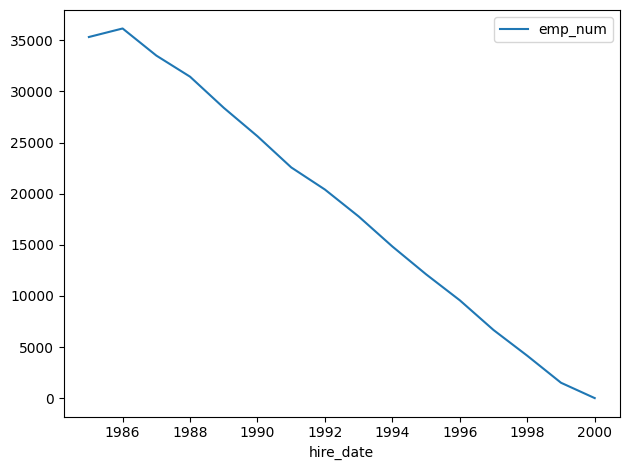

In [13]:
    df_sorted = df.sort_values('hire_year')
    plt.plot(df_sorted['hire_year'], df_sorted['emp_num'])
    plt.xlabel('hire_date')
    plt.legend(['emp_num'])
    plt.tight_layout()
    plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [14]:
df_years = pd.read_sql("""SELECT TIMESTAMPDIFF(YEAR, from_date, to_date) as duration, from_date, to_date
FROM titles
where to_date != '9999-01-01'
and title = 'Engineer'""", con)
df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

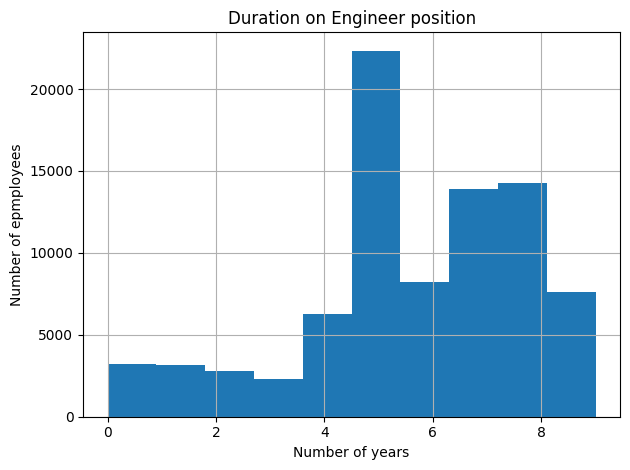

In [15]:
plt.hist(df_years['duration'])
plt.xlabel('Number of years')
plt.ylabel('Number of epmployees')
plt.title('Duration on Engineer position')
plt.grid()
plt.tight_layout()

plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [16]:
con.close()